<p><a name="pan"></a></p>

# **Pandas**

Esta es una libreria enfocada en el análisis de datos, la cual contiene una serie de estructuras de datos flexibles que permiten tener un manejo más cómodo y eficiente de los datos. Pandas está construida sobre la libreria NumPy, por lo que podemos usar los métodos y funcionalidades de los arreglos de numpy que estudiamos en las sesiones anteriores. Además, los objetos de pandas van a ser las estructuras de datos con lo cuales vamos a alimentar los algoritmos de Machine Learning, por lo que va a ser fundamental tener un buen conociemiento de estos objetos.



In [ ]:
import pandas as pd
import numpy as np

<p><a name="ser"></a></p>

# **Series**

Una serie de pandas básicamente es un arreglo unidimensional de datos indexados. Podemos construir una serie a partir de una lista o arreglo mediante el constructor `series`

In [ ]:
data = [1,4,23,5]

s = pd.Series(data)

Como vemos en la salida anterior, la serie contiene una secuencia de valores y una secuencia de índices, a los que podemos acceder con los atributos `values` e `index` respectivamente.

In [ ]:
s.values

array([ 1,  4, 23,  5])

In [ ]:
s.index

RangeIndex(start=0, stop=4, step=1)

`values` es un arreglo de numpy, mientras que `index` es un tipo de objeto por sí mismo, muy similar a un arreglo de numpy con la diferencia que este es inmutable.

In [ ]:
try:
  s.index[0] = 1
except Exception as e:
  print(f'No funciona porque: {e}')

No funciona porque: Index does not support mutable operations


Adicionalmente vemos que a la serie se asocia un tipo de dato particular, al cual podemos acceder mediante el atributo `dtype`

In [ ]:
s.dtype

dtype('int64')

Podemos especificar el tipo de dato que queremos contener con el arg por palabra clave `dtype`

In [ ]:
data = [1, 4, 23, 5]

s =pd.Series(data, dtype = 'float64')
s

0     1.0
1     4.0
2    23.0
3     5.0
dtype: float64

Podemos especificar el índice con la palabra clave `index`:

In [ ]:
ind = [4, 3, 5, 4]
data = [1, 4, 23, 5]

s =pd.Series(data, index = ind, dtype = 'float64')
s

4     1.0
3     4.0
5    23.0
4     5.0
dtype: float64

o luego de haber creado la serie:

In [ ]:
data = [1, 4, 23, 5]

s = pd.Series(data, dtype = 'float64')
print(s)
s.index = ind
s

0     1.0
1     4.0
2    23.0
3     5.0
dtype: float64


4     1.0
3     4.0
5    23.0
4     5.0
dtype: float64

Note que el índice no tiene ningún tipo de restricción respecto a su valor y frecuencia.

Podemos reinicializar el indice con el método `reset_index`

In [ ]:
s.reset_index()

,index,0
0,4,1.0
1,3,4.0
2,5,23.0
3,4,5.0


Note que el índice pasa a ser otra columna de la estructura de datos. Para evitar este comportamiento utilizamos el arg `drop`:

In [ ]:
s.reset_index(drop = True)

0     1.0
1     4.0
2    23.0
3     5.0
dtype: float64

note que el cambio no toma lugar, por lo que hay que reasignar la variable:

In [ ]:
s

4     1.0
3     4.0
5    23.0
4     5.0
dtype: float64

In [ ]:
s.reset_index(drop = True, inplace= True)
s

0     1.0
1     4.0
2    23.0
3     5.0
dtype: float64

Podemos pensar en una Serie de Pandas un poco como una especialización de un diccionario de Python.

Un diccionario es una estructura que asigna claves arbitrarias a un conjunto de valores arbitrarios, y una serie es una estructura que asigna claves de cierto tipo a un conjunto de valores de cierto tipo.



Podemos aclarar aún más la analogía de la serie como diccionario construyendo un objeto de la serie directamente desde un diccionario de Python:


In [ ]:
d_poblacion = {"Brasil": 210147125, 'Colombia': 50372424, 'Argentina': 44938712}

s_poblacion = pd.Series(d_poblacion, name = "Población")
s_poblacion

podemos seleccionar datos de la serie como si fuera un diccionario

In [ ]:
s_poblacion['Brasil']

Sin embargo, a diferencia de los diccionarios, la serie permite realizar operaciones como la segmentación:

In [ ]:
s_poblacion['Brasil':'Colombia']

Así como el código compilado específico del tipo detrás de un arreglo de NumPy lo hace más eficiente que una lista de Python para ciertas operaciones, la información de tipo de una Serie Pandas lo hace mucho más eficiente que los diccionarios de Python para ciertas operaciones.

<p><a name="dat"></a></p>

# **Dataframe**

La siguiente estructura fundamental en Pandas es el DataFrame. Al igual que el objeto Serie discutido en la sección anterior, el DataFrame puede considerarse como una generalización de un arreglo de NumPy o como una especialización de un diccionario Python.




podemos construir un dataframe a partir de un arreglo de NumPy con el constructor `DataFrame`

In [ ]:
np.random.seed(42)
datos = np.random.randint(0, 10, (3, 3))
datos

array([[6, 3, 7],
       [4, 6, 9],
       [2, 6, 7]])

In [ ]:
df = pd.DataFrame(datos, dtype = 'float64')
df

,0,1,2
0,6.0,3.0,7.0
1,4.0,6.0,9.0
2,2.0,6.0,7.0


En este caso obtenemos un objeto tipo index tanto para las filas como para las columnas

In [ ]:
print(df)

     0    1    2
0  6.0  3.0  7.0
1  4.0  6.0  9.0
2  2.0  6.0  7.0


In [ ]:
df.values

In [ ]:
df.index

In [ ]:
df.columns

al igual que vimos con las series, podemos cambiar tanto las filas como las columnas al momento de la construcción del objeto, o posteriormente mediante la modificicación de los atributos `index` y `columns` del objeto:

In [ ]:
colu = [f"Caracteristica_{i}" for i in range(1,4)]
ind = [f"Instancia_{i}" for i in range(1,4)]

df = pd.DataFrame(datos, dtype = 'float64', index = ind, columns = colu)
df

,Caracteristica_1,Caracteristica_2,Caracteristica_3
Instancia_1,6.0,3.0,7.0
Instancia_2,4.0,6.0,9.0
Instancia_3,2.0,6.0,7.0


In [ ]:
df.reset_index(drop = True)

,Caracteristica_1,Caracteristica_2,Caracteristica_3
0,6.0,3.0,7.0
1,4.0,6.0,9.0
2,2.0,6.0,7.0


De forma análoga a las series, podemos resetear el índice. Note que al igual que en el caso de la serie, el cambio no toma lugar sino que simplemente es una vista de la operación. Podemos redefinir el dataframe o alternativamente utilizar el kwarg `inplace` para que el cambio tome lugar:

In [ ]:
df

,Caracteristica_1,Caracteristica_2,Caracteristica_3
Instancia_1,6.0,3.0,7.0
Instancia_2,4.0,6.0,9.0
Instancia_3,2.0,6.0,7.0


In [ ]:
df.reset_index(drop = True, inplace = True)
df

,Caracteristica_1,Caracteristica_2,Caracteristica_3
0,6.0,3.0,7.0
1,4.0,6.0,9.0
2,2.0,6.0,7.0


Podemos modificar un índice de fila o columna individualmente mediante el método `rename`:

In [ ]:
df.rename(columns={'Caracteristica_1': 'Col1'}, index = {0: 'instancia_0'}, inplace =True)

In [ ]:
df

,Col1,Caracteristica_2,Caracteristica_3
instancia_0,6.0,3.0,7.0
1,4.0,6.0,9.0
2,2.0,6.0,7.0


Si una serie es un análogo de un arreglo unidimensional con índices flexibles, un DataFrame es un análogo de un arreglo bidimensional con índices de fila flexibles y nombres de columna flexibles.

Del mismo modo que podría pensar en un arreglo bidimensional como una secuencia ordenada de columnas unidimensionales alineadas, puede pensar en un DataFrame como una secuencia de Series alineadas. Aquí, por "alineado" queremos decir que comparten el mismo índice.

Podemos seleccionar una serie individual del dataframe de la siguiente manera:

In [ ]:
df['Col1']

instancia_0    6.0
1              4.0
2              2.0
Name: Col1, dtype: float64

In [ ]:
df.Col1

instancia_0    6.0
1              4.0
2              2.0
Name: Col1, dtype: float64

Por lo tanto, el DataFrame puede considerarse como una generalización de un arreglo de NumPy bidimensional, donde tanto las filas como las columnas tienen un índice generalizado para acceder a los datos.

In [ ]:
arr = np.random.randn(27).reshape(3,3,3)

(3, 3)

,instancia_0,1,2
Col1,6.0,4.0,2.0
Caracteristica_2,3.0,6.0,6.0
Caracteristica_3,7.0,9.0,7.0


esto le veremos de mejor manera cuando estudiemos las operaciones sobre las series y los dataframes.

Veamos otras formas alternativas de construir un dataframe:

In [ ]:
# from a dictionary
dic = {"Nombre":["Camilo", "Mateo"],
       "Apellido":["Pareja", "Galeano"],
       "Email":["camilo@correo", "mateo@correo"]}



In [ ]:
# from a dictionary of series objects
d_poblacion = {"Brasil":210147125, "Colombia": 50372424, "Argentina":44938712}
d_area = {"Brasil":8514877, "Colombia":1141748, "Argentina": 2792600}

df = pd.DataFrame({"Area": s_area,
                   "Poblacion": s_poblacion})

In [ ]:
#s_area = pd.Series(d_area, name="area")
#s_poblacion = pd.Series(d_poblacion, name="poblacion")

df = pd.DataFrame([s_poblacion, s_area])
df

<p><a name="car"></a></p>

# **Cargando conjuntos de datos**

En las secciones anteriores estudiamos los objetos fundamentales de Pandas: series y dataframes. Vimos cómo crear estos objetos a partir de diferentes estructuras de datos generados por nosotros mismos. Sin embargo, la mayoría de las veces, no utilizaremos nuestros propios datos sino que trabajaremos con datos que ya existen. Veamos algunas opciones para descargar conjuntos de datos en la web:

[Kaggle](https://www.kaggle.com/)

[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

[Google](https://datasetsearch.research.google.com/)

Ahora, nuestro objetivo es cargar uno de estos conjuntos de datos en un DataFrame de Pandas. La función que debemos utilizar para esta tarea dependerá del formato en el que se ha generado el conjunto de datos. El formato más común es el CSV, para el cual pandas nos proporciona la funcion `read_csv`:

o desde [github](https://github.com/diplomadomludea/2020-2)

In [ ]:
df =pd.read_csv("https://raw.githubusercontent.com/tomasate/Datos_Clases/main/Datos_1/adult.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K
48838,4,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,2,United-States,<=50K
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K
48840,2,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States,<=50K


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Veamos algunos atributos del dataframe

In [ ]:
df.shape

(48842, 15)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capitalgain', 'capitalloss', 'hoursperweek', 'native-country',
       'class'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=48842, step=1)

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capitalgain        int64
capitalloss        int64
hoursperweek       int64
native-country    object
class             object
dtype: object

Para una mejor visualización del DataFrame podemos utilizar el método `head`, que por defecto nos muestra únicamente las primeras cinco filas del dataframe:

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


o utilizar `tail` para ver las últimas cinco filas:

In [ ]:
df.tail(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K
48840,2,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States,<=50K
48841,1,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,United-States,>50K


O utilizar el método `sample` para visualizar registros de forma aleatoria:

In [ ]:
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
2376,2,Private,129573,HS-grad,9,Never-married,Sales,Not-in-family,Black,Female,0,0,2,United-States,<=50K
25850,2,Local-gov,348172,Bachelors,13,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,2,0,2,United-States,>50K
19254,3,Local-gov,425804,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,2,United-States,>50K
4617,1,Federal-gov,72338,Assoc-voc,11,Never-married,Prof-specialty,Other-relative,Asian-Pac-Islander,Male,0,0,2,United-States,<=50K
8562,3,Private,122066,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,1,Hungary,<=50K


### **Funciones de resumen**

Pandas nos proporciona varios métodos para obtener información reeestructurada de los datos en una forma útil.

El método `info` nos muestra un resumen conciso de nuestro conjunto de datos:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


El metodo `describe` genera un resumen estadistico de las columnas. este dependerá del tipo de dato que se almacene en la columna.

Por defecto, se realiza sobre los tipos de datos numericos.

In [ ]:
df.describe()

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,1.771078,1.896641e+05,10.078089,0.200319,0.114942,1.950698
std,1.295378,1.056040e+05,2.570973,0.746182,0.556924,0.897038
min,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.175505e+05,9.000000,0.000000,0.000000,2.000000
50%,2.000000,1.781445e+05,10.000000,0.000000,0.000000,2.000000
75%,3.000000,2.376420e+05,12.000000,0.000000,0.000000,2.000000
max,4.000000,1.490400e+06,16.000000,4.000000,4.000000,4.000000


Podemos ver cada columna independientemente:

In [ ]:
df["fnlwgt"].describe()

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

U obtener cada valor individualmente:

In [ ]:
df["fnlwgt"].quantile(0.33)

139459.77000000002

Para obtener el resumen estadístico de un tipo de dato particular podemos utilizar el kwarg `include`:

In [ ]:
df.describe(include= "object")

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


Podemos ver los elementos únicos de una serie y su número con el metodo `uniuque` y `nunique`, respectivamente:

In [ ]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df['workclass'].nunique()

8

Podemos usar el metodo `value_counts` para obtener una serie con el la frecuencia con la que aparecen estos valores unicos:

In [ ]:
df["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Podemos ver esta información gráficamente

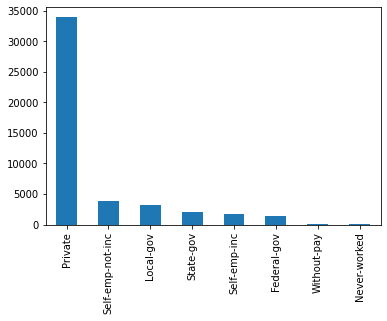

In [ ]:
df["workclass"].value_counts().plot(kind ="bar");

<p><a name="ind"></a></p>

# **Indexación, selección y asignación**

En sesiones anteriores estudiamos los métodos y funcionalidades para acceder, asignar y modificar valores de un arreglo de NumPy. Estos incluian indexación, segmentación, enmascaramiento, indexación sofisticada y combinaciones de estas.

Veamos ahora los elementos necesarios para indexar, seleccionar y modificar valores en las Series y DataFrames de Pandas.

### **Series**



In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


como ya hemos visto, la serie se puede pensar como una especialización de un diccionario de python. Por especialización me refiero a que en la serie, a diferencia del diccionario de python, podemos realizar operaciones de indexación como si esta fueran un arreglo.

Por ejemplo, para la selección:



In [ ]:
s = df["age"][:4].copy()
s.index = ["a", "b", "c", "d"]
s

a    2
b    3
c    2
d    3
Name: age, dtype: int64

In [ ]:
df["age"]

0        2
1        3
2        2
3        3
4        1
        ..
48837    2
48838    4
48839    2
48840    2
48841    1
Name: age, Length: 48842, dtype: int64

In [ ]:
#s["a"]
#s.a
s[0]

2

de esta forma podemos asignar nuevos elementos a la serie:

In [ ]:
s["a"] = 200
s["e"] = 200

print(s)

a    200
b      3
c      2
d      3
e    200
Name: age, dtype: int64


Y al ser una especialización de un diccionario, podemos realizar operaciones de segmentación:

In [ ]:
s["a": "c"]

a    200
b      3
c      2
Name: age, dtype: int64

In [ ]:
s[0 : 2]

a    200
b      3
Name: age, dtype: int64

Noten que cuando se segmenta con un índice explícito, el índice final se incluye en la segmentación, mientras que cuando se segmenta con un índice implícito, el índice final se excluye de la segmentación!

Estas convenciones de indexación y segmentación puedan ser una fuente de confusión cuando los valores del índice son numéricos.

Para ver esto de forma clara cambiemos los valores del índice de nuestra serie:



In [ ]:
s.index = np.arange(1, 10, 2)
s

1    200
3      3
5      2
7      3
9    200
Name: age, dtype: int64

una operación de indexación usará los índices explicitos:

In [ ]:
s[1]

200

mientras que una operación de segmentación usará los índices implicitos:

In [ ]:
s[1 : 3]

3    3
5    2
Name: age, dtype: int64

El enmascaramiento funciona de forma similar a como la vimos en los arreglos de NumPy:

In [ ]:
s > 2

1     True
3     True
5    False
7     True
9     True
Name: age, dtype: bool

In [ ]:
s[ s > 2]

1    200
3      3
7      3
9    200
Name: age, dtype: int64

In [ ]:
s[(s > 2) & ( s < 5)]

3    3
7    3
Name: age, dtype: int64

En el caso de la indexación sofisticada vamos a poder utilizar tanto indices explícitos como implícitos

In [ ]:
s = df["age"][:4].copy()
s.index = ["a", "b", "c", "d"]
s

a    2
b    3
c    2
d    3
Name: age, dtype: int64

In [ ]:
s[["d", "b"]]

d    3
b    3
Name: age, dtype: int64

In [ ]:
s[[3, 1]]

d    3
b    3
Name: age, dtype: int64

Debido a esta posible confusión en el caso de los índices enteros, Pandas proporciona algunos atributos especiales para la indexación que exponen explícitamente ciertos esquemas de indexación. Estos no son métodos funcionales, sino atributos que exponen una interfaz de segmentación particular para los datos de la Serie.

### **loc**

El atributo o indexador `loc` permite indexar y segmentar haciendo siempre referencia al índice explícito:

In [ ]:
s.index = np.arange(1,8,2)
s

1    2
3    3
5    2
7    3
Name: age, dtype: int64

In [ ]:
s.loc[1]

2

In [ ]:
s.loc[3: 5]

3    3
5    2
Name: age, dtype: int64

### **iloc**

El atributo `iloc` permite permite indexar y segmentar haciendo siempre referencia al índice implícito:


In [ ]:
s

1    2
3    3
5    2
7    3
Name: age, dtype: int64

In [ ]:
s.iloc[0]

2

In [ ]:
s.iloc[1:3]

3    3
5    2
Name: age, dtype: int64

Noten que en el caso de `iloc`, el indice final, como pasa con los arreglos de NumPy, no se incluye en la selección. Mientras que con `loc`, el indice final sí se incluye en la selección.

Esta naturaleza explícita que nos proporcionan los indexadores `loc` y `iloc` los hacen muy útiles para mantener un código limpio y legible.

Especialmente en el caso donde se tengan índices enteros, se recomienda usar estos indexadores para hacer que el código sea más fácil de leer y comprender, y para evitar errores sutiles debido a la convención mixta de indexación/segmentación.


## **Dataframe**

Veamos ahora los mismos elementos que vimos con la serie, para el caso del DataFrame:

Recordemos que el  DataFrame se puede pensar como un arreglo bidimensional mejorado o como un diccionario de series que comparten el mismo índice.

Como ya vimos, la sintaxis de estilo diccionario también se puede usar para seleccionar una columna en el DataFrame:






In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [ ]:
df["education"]
df.education

0        Bachelors
1        Bachelors
2          HS-grad
3             11th
4        Bachelors
           ...    
48837    Bachelors
48838      HS-grad
48839    Bachelors
48840    Bachelors
48841    Bachelors
Name: education, Length: 48842, dtype: object

también podemos usar esta sintáxis para modificar un valor o asignar una nueva columna. Por ejemplo, podemos asignar un valor constante a una **columna**:

In [ ]:
df["col_new"] = "value"
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class,col_new
23398,4,Private,28367,Bachelors,13,Married-civ-spouse,Priv-house-serv,Other-relative,White,Male,0,0,4,United-States,<=50K,value
45068,1,Private,315203,7th-8th,4,Never-married,Other-service,Not-in-family,White,Female,0,0,1,Dominican-Republic,<=50K,value
11288,0,Private,315524,Some-college,10,Never-married,Adm-clerical,Own-child,Black,Male,0,0,1,Dominican-Republic,<=50K,value
22671,1,Self-emp-inc,275094,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,3,0,3,Mexico,>50K,value
17341,2,Private,88913,Some-college,10,Never-married,Handlers-cleaners,Own-child,Asian-Pac-Islander,Female,1,0,2,United-States,<=50K,value


o asignar un objeto iterable

In [ ]:
df["square_index"] = (np.arange(df.shape[0]))**2
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class,col_new,square_index
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K,value,0
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K,value,1
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K,value,4
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K,value,9
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K,value,16


Como se mencionó anteriormente, también podemos ver el DataFrame como un arreglo bidimensional mejorado. Recordemos que podemos examinar el arreglo de datos subyacente utilizando el atributo values:


In [ ]:
df.values

array([[2, 'State-gov', 77516, ..., '<=50K', 'value', 0],
       [3, 'Self-emp-not-inc', 83311, ..., '<=50K', 'value', 1],
       [2, 'Private', 215646, ..., '<=50K', 'value', 4],
       ...,
       [2, 'Private', 374983, ..., '<=50K', 'value', 2385247921],
       [2, 'Private', 83891, ..., '<=50K', 'value', 2385345600],
       [1, 'Self-emp-inc', 182148, ..., '>50K', 'value', 2385443281]],
      dtype=object)

Teniendo en cuenta esto (dataFrame como un arreglo bidimensional mejorado), podemos realizar algunas operaciones sobre este como si fuera un arreglo de numpy. Por ejemplo, podemos transponer el DataFrame completo para intercambiar filas y columnas:


In [ ]:
df2 = df.head().copy()
df2.T

,0,1,2,3,4
age,2,3,2,3,1
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
education-num,13,13,9,7,13
marital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


Sin embargo, cuando se trata de indexar dataframes, la indexación de columnas con el estilo de diccionario nos impide tratarlo como un arreglo de NumPy.

Veamoslo, si pasamos un indice a un arreglo, seleccionaremos una fila:


In [ ]:
df2 = df2.T
df2.values[0]

array([2, 3, 2, 3, 1], dtype=object)

mientras que al pasar un solo "índice" a un DataFrame estamos seleccionando una columna:


In [ ]:
df2.values[0,0]

2

Por lo tanto, si queremos indexar el DataFrame con un estilo de arreglo, necesitamos otra convención. Aquí de nuevo Pandas nos proporciona los indexadores `loc` y `iloc`.

Usando el indexador `iloc`, vamos a poder indexar el arreglo subyacente como si fuera un arreglo de NumPy, manteniendo el indice y las columnas del dataframe.




In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class,col_new,square_index
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K,value,0
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K,value,1
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K,value,4
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K,value,9
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K,value,16


en este caso, si pasamos un indice, seleccionaremos una fila

In [ ]:
df.iloc[0]

age                           2
workclass             State-gov
fnlwgt                    77516
education             Bachelors
education-num                13
marital-status    Never-married
occupation         Adm-clerical
relationship      Not-in-family
race                      White
sex                        Male
capitalgain                   1
capitalloss                   0
hoursperweek                  2
native-country    United-States
class                     <=50K
col_new                   value
square_index                  0
Name: 0, dtype: object

para seleccionar una columna con iloc:

In [ ]:
df.iloc[:,0]

0        2
1        3
2        2
3        3
4        1
        ..
48837    2
48838    4
48839    2
48840    2
48841    1
Name: age, Length: 48842, dtype: int64

segmentacion:

In [ ]:
df.iloc[:2,3:5]

,education,education-num
0,Bachelors,13
1,Bachelors,13


indexacion sofisticada:

In [ ]:
# seleccionar las filas 1, 18, 3
df.iloc[[1, 18, 3]]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class,col_new,square_index
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K,value,1
18,2,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,3,United-States,<=50K,value,324
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K,value,9


In [ ]:
# seleccionar las primeras tres filas
# y las columnas 1, 3 y 5
df.iloc[:3, [1, 3, 5]]

,workclass,education,marital-status
0,State-gov,Bachelors,Never-married
1,Self-emp-not-inc,Bachelors,Married-civ-spouse
2,Private,HS-grad,Divorced


Del mismo modo, usando el indexador `loc` podemos indexar los datos subyacentes en un estilo de arreglo, pero usando el índice explícito y los nombres de columna:

In [ ]:
df.loc[0]

age                           2
workclass             State-gov
fnlwgt                    77516
education             Bachelors
education-num                13
marital-status    Never-married
occupation         Adm-clerical
relationship      Not-in-family
race                      White
sex                        Male
capitalgain                   1
capitalloss                   0
hoursperweek                  2
native-country    United-States
class                     <=50K
col_new                   value
square_index                  0
Name: 0, dtype: object

In [ ]:
df.loc[:,"age"]

0        2
1        3
2        2
3        3
4        1
        ..
48837    2
48838    4
48839    2
48840    2
48841    1
Name: age, Length: 48842, dtype: int64

Como vimos con la serie para la segmentación, cuando se utiliza el indexador `loc`, el indice final se incluye:

In [ ]:
df.loc[0:1,['education', 'education-num']]

,education,education-num
0,Bachelors,13
1,Bachelors,13


indexacion sofisticada:

In [ ]:
df.loc[:2 ,["workclass",	"education",	"marital-status"]]

,workclass,education,marital-status
0,State-gov,Bachelors,Never-married
1,Self-emp-not-inc,Bachelors,Married-civ-spouse
2,Private,HS-grad,Divorced


Cuando utilizamos el indexador `loc`, podemos utilizar enmascaramiento: Por ejemplo, filtremos el dataframe con las personas que están divorciadas:

In [ ]:
df.loc[df['marital-status'] == "Divorced"]
df.loc[df['marital-status'] == "Divorced", "workclass"]
df.loc[df['marital-status'] == "Divorced", ["workclass"]]

,workclass
2,Private
19,Self-emp-not-inc
24,Private
28,Private
32,Private
...,...
48818,Self-emp-inc
48829,Private
48835,Local-gov
48837,Private


Recordemos que podemos tener varias condiciones en el enmascaramiento. Por ejemplo, filtremos por personas que trabajen en el gobierno local y tengan un bachillerato como nivel de eduación:

In [ ]:
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [ ]:
df.loc[(df.workclass == "Local-gov") & (df['education'] == "HS-grad")]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class,col_new,square_index
86,3,Local-gov,268234,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,2,United-States,>50K,value,7396
108,1,Local-gov,189265,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,2,United-States,<=50K,value,11664
210,2,Local-gov,160943,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,2,United-States,<=50K,value,44100
436,1,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,1,0,3,United-States,<=50K,value,190096
461,3,Local-gov,288825,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,2,United-States,<=50K,value,212521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48618,0,Local-gov,157678,HS-grad,9,Married-spouse-absent,Machine-op-inspct,Unmarried,White,Female,1,0,2,United-States,<=50K,value,2363709924
48684,3,Local-gov,56915,HS-grad,9,Divorced,Exec-managerial,Unmarried,Amer-Indian-Eskimo,Male,0,0,0,United-States,<=50K,value,2370131856
48709,4,Local-gov,132668,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,0,United-States,<=50K,value,2372566681
48713,3,Local-gov,244813,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,2,United-States,<=50K,value,2372956369


filtrar personas por nivel educativo que ganen más de 50k al año

In [ ]:
df.loc[df['class'] == ">50K", "education"]

7             HS-grad
8             Masters
9           Bachelors
10       Some-college
11          Bachelors
             ...     
48815         Masters
48816         Masters
48822     Prof-school
48826         Masters
48841       Bachelors
Name: education, Length: 11687, dtype: object

Veamos la frecuencia con la que aparece cada valor



In [ ]:
df.loc[df['class'] == ">50K", "education"].value_counts()

Bachelors       3313
HS-grad         2503
Some-college    2063
Masters         1459
Prof-school      617
Assoc-voc        522
Doctorate        431
Assoc-acdm       413
11th              92
10th              87
7th-8th           62
12th              48
9th               41
5th-6th           27
1st-4th            8
Preschool          1
Name: education, dtype: int64

filtrar personas que estén divorciadas o que no se hayan casado

In [ ]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [ ]:
df.loc[(df['marital-status'] == "Divorced") | (df['marital-status'] == "Never-married")]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class,col_new,square_index
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K,value,0
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K,value,4
8,1,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,4,0,3,United-States,>50K,value,64
12,0,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,1,United-States,<=50K,value,144
13,1,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,3,United-States,<=50K,value,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48834,0,Private,350977,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,2,United-States,<=50K,value,2384759556
48835,3,Local-gov,349230,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,2,United-States,<=50K,value,2384857225
48836,1,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,2,United-States,<=50K,value,2384954896
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K,value,2385052569


Pandas viene con algunos selectores condicionales incorporados. Uno de estos es `isin`. Este nos permite seleccionar datos cuyo valor "está en" una lista de valores.

Por ejemplo, utilicemoslo para realizar el filtrado anterior



In [ ]:
df['marital-status'].isin(["Divorced","Never-married"])

0         True
1        False
2         True
3        False
4        False
         ...  
48837     True
48838    False
48839    False
48840     True
48841    False
Name: marital-status, Length: 48842, dtype: bool

In [ ]:
df[df['marital-status'].isin(["Divorced","Never-married"])]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class,col_new,square_index
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K,value,0
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K,value,4
8,1,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,4,0,3,United-States,>50K,value,64
12,0,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,1,United-States,<=50K,value,144
13,1,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,3,United-States,<=50K,value,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48834,0,Private,350977,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,2,United-States,<=50K,value,2384759556
48835,3,Local-gov,349230,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,2,United-States,<=50K,value,2384857225
48836,1,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,2,United-States,<=50K,value,2384954896
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K,value,2385052569


el método `between`, nos permite seleccionar elementos en un rango dado:

In [ ]:
df.age.unique()

array([2, 3, 1, 0, 4])

In [ ]:
df.loc[(df.age >= 2) & (df.age <= 3)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class,col_new,square_index
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K,value,0
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K,value,1
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K,value,4
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K,value,9
5,2,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,2,United-States,<=50K,value,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48831,3,Private,285570,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,2,United-States,<=50K,value,2384466561
48835,3,Local-gov,349230,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,2,United-States,<=50K,value,2384857225
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K,value,2385052569
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K,value,2385247921


In [ ]:
df.age.between(2, 3)

0         True
1         True
2         True
3         True
4        False
         ...  
48837     True
48838    False
48839     True
48840     True
48841    False
Name: age, Length: 48842, dtype: bool

In [ ]:
df[df.age.between(2, 3)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class,col_new,square_index
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K,value,0
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K,value,1
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K,value,4
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K,value,9
5,2,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,2,United-States,<=50K,value,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48831,3,Private,285570,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,2,United-States,<=50K,value,2384466561
48835,3,Local-gov,349230,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,2,United-States,<=50K,value,2384857225
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K,value,2385052569
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K,value,2385247921
